# 分析IRAs

In [1]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm

sns.set_style('white')
import graph_tool.all as gt

In [3]:
%time user_data = pd.read_csv('data/ira_users_csv_hashed.csv')
# user_data.head()

CPU times: user 16 ms, sys: 4 ms, total: 20 ms
Wall time: 21.9 ms


In [4]:
user_data.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [5]:
user_data.describe()

follower_count  following_count
count     3836.000000      3836.000000
mean      1664.950209       826.092023
std       8860.043408      2726.252326
min          0.000000         0.000000
25%         58.000000       104.000000
50%        126.000000       239.000000
75%        461.250000       542.000000
max     257638.000000     74664.000000

In [11]:
# %matplotlib inline

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

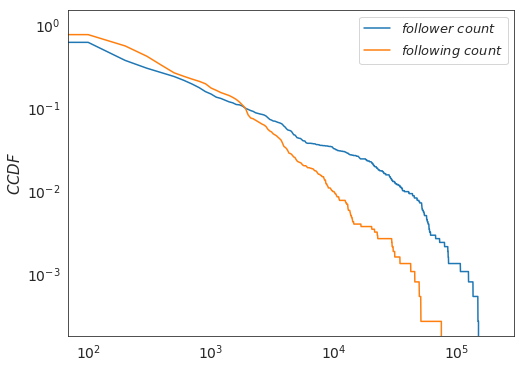

In [26]:
# user_data
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_data['follower_count'], 0, 200000, 100)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='$follower\ count$')

pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_follower_count.csv')


x, cdf, pdf = get_cdf_pdf(user_data['following_count'], 0, 100000, 100)
plt.ylabel('$CCDF$', fontsize=15)
pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_following_count.csv')


plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xscale('log'); plt.yscale('log')

plt.plot(x, cdf, label='$following\ count$')
plt.legend(fontsize=13)
plt.savefig('fig/fol.pdf', dpi=300)
plt.show()



In [60]:
sns.set(style="ticks")

# rs = np.random.RandomState(11)
# x = rs.gamma(2, size=100'""
# y = -.5 * x + rs.normal(size=1000)
x = []
y = []
for i, row in user_data.iterrows():
    if row.follower_count > 1 and row.following_count > 1:
        x.append(np.log10(row.follower_count))
        y.append(np.log10(row.following_count))
#         x.append(row.follower_count)
#         y.append(row.following_count)

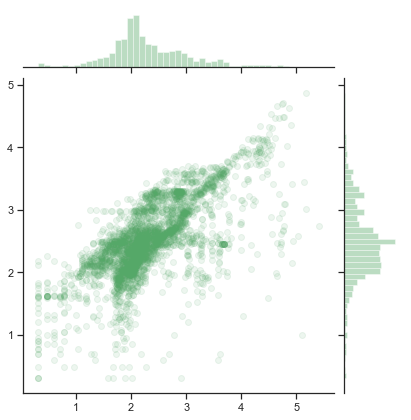

In [70]:
# sns.jointplot(x, y, kind="hex")
# plt.xlim(0.5, 4.5)
# plt.ylim(0.5, 4.5)
# plt.legend()
sns.jointplot(x, y, alpha=0.1, color="g")
# plt.xscale("log"); plt.yscale("log")
plt.show()

In [23]:
user_data.iloc[user_data['follower_count'].idxmax(), :]

userid                                                             2527472164
user_display_name                                              Вестник Москвы
user_screen_name                                                   NovostiMsk
user_reported_location                                                 Москва
user_profile_description    Невозможно не любить этот город! Телефон редак...
user_profile_url                                      https://t.co/sIJZDK1hTI
follower_count                                                         257638
following_count                                                           544
account_creation_date                                     2014-05-04 00:00:00
account_language                                                           en
Name: 1014, dtype: object

In [24]:
user_data.iloc[user_data['following_count'].idxmax(), :]

userid                                                             4224729994
user_display_name                                                   Tennessee
user_screen_name                                                      TEN_GOP
user_reported_location                                                    NaN
user_profile_description    Unofficial Twitter of Tennessee Republicans. C...
user_profile_url                                                          NaN
follower_count                                                         147767
following_count                                                         74664
account_creation_date                                     2015-11-19 00:00:00
account_language                                                           en
Name: 2642, dtype: object

In [15]:
# user_data.groupby('account_creation_date').count()
user_data['account_creation_date'] = pd.to_datetime(user_data['account_creation_date'])
A = user_data.set_index('account_creation_date')
B = A.to_period('M').groupby('account_creation_date').count()
# creation_dates = pd.to_datetime(user_data["account_creation_date"])
# pd.date_range(2010)
# sum(B['userid'])

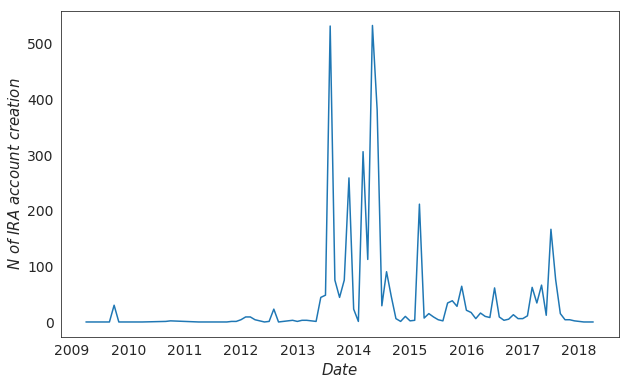

In [16]:
plt.figure(figsize=(10, 6))
# plt.plot_date(B.index, B['userid'])
B['userid'].plot()
plt.xlabel('$Date$', fontsize=15); plt.ylabel('$N\ of\ IRA\ account\ creation$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/account_creation.pdf', dpi=300)
plt.show()

B.to_csv('account_creation.csv')

In [3]:
# load tweets

%time tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', dtype=str, low_memory=True)

CPU times: user 1min 19s, sys: 4.5 s, total: 1min 23s
Wall time: 1min 29s


In [4]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [9]:
tweets.userid.value_counts().describe()

count      3667.000000
mean       2465.587128
std        5751.521045
min           1.000000
25%         129.000000
50%         553.000000
75%        2743.500000
max      159503.000000
Name: userid, dtype: float64

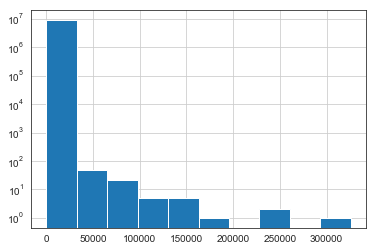

In [6]:
# plt.xscale("log")

plt.yscale("log")
tweets.like_count.hist()

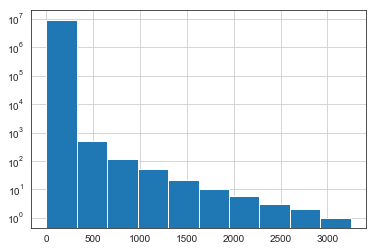

In [7]:
plt.yscale("log")
tweets.reply_count.hist()

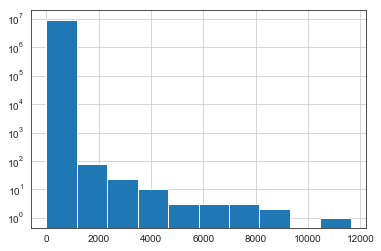

In [8]:
plt.yscale("log")
tweets.quote_count.hist()

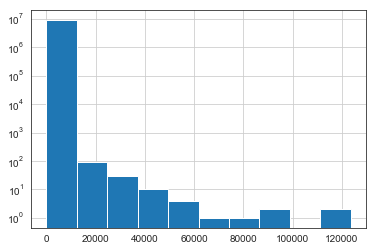

In [9]:
plt.yscale("log")
tweets.retweet_count.hist()

In [11]:
tweets['tweet_time'] = pd.to_datetime(tweets['tweet_time'])
election_tweets = tweets[tweets["tweet_time"] >= "2016-06-01"]

In [12]:
A = election_tweets.set_index('tweet_time')
A = tweets.set_index('tweet_time')
B = A.to_period('M').groupby('tweet_time').count()

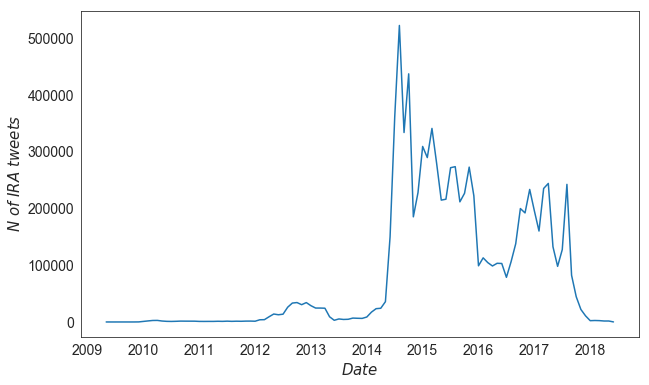

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot_date(B.index, B['userid'])
B['tweetid'].plot()
plt.xlabel('$Date$', fontsize=15); plt.ylabel('$N\ of\ IRA\ tweets$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/tweet_creation.pdf', dpi=300)
plt.show()

B['tweetid'].to_csv('tweet_creation.csv')

从整体上看2016年的选举，IRA的表现并不是很活跃；

In [31]:
from urllib.parse import urlparse
import requests

for i, row in tweets.iterrows():
    if not isinstance(row['urls'], str):
        tweets.drop(i)
    elif row['urls'][1: -1] == '':
        tweets.drop(i)
    else:
        url = row['urls'][1: -1]
        res = requests.head(url)
        hostname = urlparse(res.headers.get('location')).hostname
        if hostname:
            print(i, url, '>', hostname)
        else:
            tweets.drop(i)
        break
        
#     print(row)
#     if isinstance(urls, str):
#         url = urls[1: -1]
#         if url:
# #             hostname = urllib.parse.urlparse(url).hostname
#             res = requests.head(url)
#             hostname = urlparse(res.headers.get('location')).hostname
#             if hostname:
#                 print(hostname, type(hostname))



0 http://ru-open.livejournal.com/374284.html > ru-open.livejournal.com


In [47]:
# build retweet networks

userid_map = json.load(open("data/userid_mapping.json"))
G = nx.DiGraph()
G.add_nodes_from(userid_map.values())
# G.number_of_nodes()

for i, row in tweets.iterrows():
    if row["is_retweet"]:
        if row['retweet_userid'] in userid_map:
            ret_userid = userid_map[row['retweet_userid']]
            userid = userid_map[row['userid']]
            if ret_userid != userid:
                G.add_edge(ret_userid, userid)

# save the network
nx.readwrite.adjlist.write_adjlist(G, 'retweet_net_in_IRA.dat')

In [21]:
G = nx.readwrite.adjlist.read_adjlist('retweet_net_in_IRA.dat')

In [48]:
G.number_of_nodes()

3836

In [49]:
G.number_of_edges()

168074

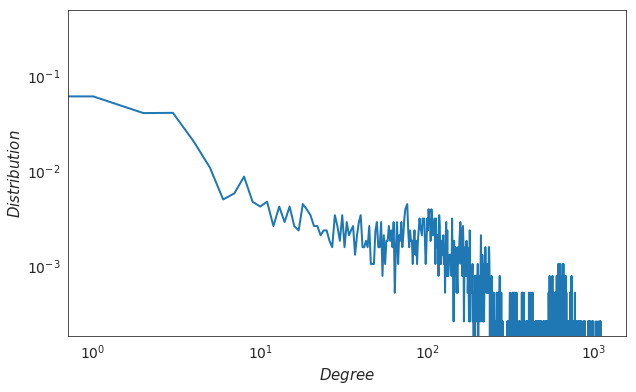

0 76
1 236
14 633
21 656
22 676
104 682
372 700
836 702
857 838
986 944
1020 1027
2168 1084
2274 1088
3585 1092


KeyError: 3585

In [66]:
plt.figure(figsize=(10, 6))

degree = nx.degree_histogram(G)
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree]  
plt.loglog(x, y, linewidth=2)
plt.xlabel('$Degree$', fontsize=15); plt.ylabel('$Distribution$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/degree_distribution.pdf', dpi=300)
plt.show()

d = dict(G.degree())
n, de = 0, 0
for k, v in d.items():
    if v > de:
        print(k, v)
        n, de = k, v
        
userid_map = json.load(open("data/userid_mapping.json"))
userid_map[n]

33162


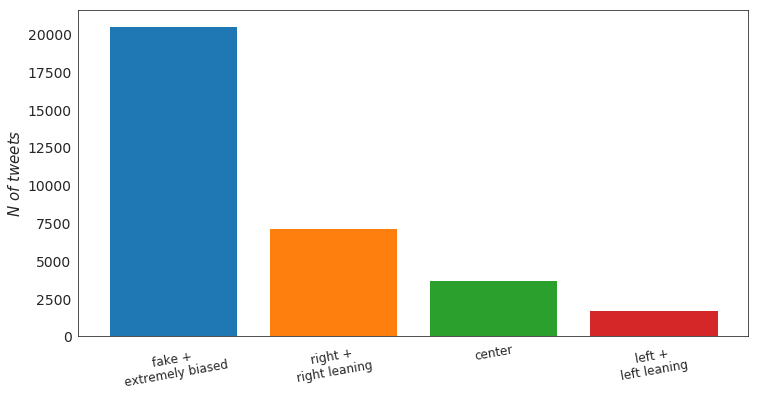

In [59]:
plt.figure(figsize=(12, 6))
x = [11638 + 8910, 42 + 7102, 3707, 1042 + 721]
print(sum(x))
label = ['fake +\n extremely biased', 'right +\nright leaning', 'center', 'left +\nleft leaning']
plt.bar(1, x[0])
plt.bar(2, x[1])
plt.bar(3, x[2])
plt.bar(4, x[3])
plt.xticks([1, 2, 3, 4], label, rotation=10)
plt.ylabel('$N\ of\ tweets$', fontsize=15)
plt.xticks(fontsize=12); plt.yticks(fontsize=14)
plt.savefig('fig/fake_news_bar.pdf', dpi=300)
plt.show()


发现了一些匿名的用户的真实id，但是非常的少；

位置：data/IRAs_be_found.json，仅仅命中了21857

3836个用户中匿名有3669个；

## 如何判断一个人是不是IRAs？

所以我要创造一个UID of IRAs 


In [5]:
uids_of_IRA = set(json.load(open("data/IRA_match.json")).values())

In [6]:
# 看看IRAs在我fake news的数据中有哪些？

IRA_tweet_ids = set()
for line in open("data/IRAs_be_found.json"):
    d = json.loads(line)
    IRA_tweet_ids.add(d["tweet_id"])

In [7]:
url_tweets = json.load(open("data/url_tweets.json"))

In [8]:
IRA_tweets = [] # 存在在fake news里面的

cnt_0 = 0
cnt_1 = 0
cnt_2 = 0

for i, fake in enumerate(url_tweets):
#     print(i, fake)
    for j, t in enumerate(fake["tweets"]):
        if t["id"] in IRA_tweet_ids:
            cnt_2 += 1
            IRA_tweets.append(t["id"])
            url_tweets[i]["tweets"][j]["IRA"] = True
            if t["origin"]:
                cnt_1 += 1
                if j == 0:
                    cnt_0 += 1
        else:
            url_tweets[i]["tweets"][j]["IRA"] = False
                    
cnt_0, cnt_1, cnt_2

url_tweets[-1]

{'url': 'http://ln.is/truthfeed.com/viral-/znh3p',
 'tweets': [{'id': 796583343882207233,
   'dt': '2016-11-10 00:20:43',
   'origin': True,
   'user_id': 124896632,
   'IRA': False}]}

由目前的数据看，IRAs的活跃度很低。有可能是数据不重叠的问题，毕竟我之前的结果发现其中有大量的假新闻。我是不是应该解析URL然后添加进去呢？

1. 解析URL，如果满足的话就添加进去；
2. 看转发网络，如果转发了fake news里面数据就添加进去；

从以上两点可以扩充数据！

URL先继续解析着～

In [10]:
%time ele_tweets = pd.read_csv('data/ira-tweets-ele.csv', dtype=str)
# all_tweets = all_tweets.dropna()
len(ele_tweets)

CPU times: user 3.41 s, sys: 140 ms, total: 3.55 s
Wall time: 3.76 s


391680

In [11]:
ele_tweets.userid.value_counts().describe()

count      556.000000
mean       704.460432
std       1439.989381
min          1.000000
25%          8.000000
50%        114.500000
75%        903.250000
max      12308.000000
Name: userid, dtype: float64

In [13]:
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0

# 这些tweet转发了fake news，他们有可能不在数据里面？？但是他们全部都刚好不在数据里面？？？
IRAs_retweets = []

for i, fake in enumerate(url_tweets):
    for j, t in enumerate(fake["tweets"]):
        if t["id"] in IRA_retweet_tweetids:
            tmp = all_tweets[all_tweets["retweet_tweetid"]==str(t["id"])]
            for _, row in tmp.iterrows():
                url_tweets[i]["tweets"].append({
                    "id": int(row["tweetid"]),
                    "dt": row["tweet_time"] + ":00",
                    "origin": False,
                    "IRA": True,
                    "user_id": row["userid"]
                })
                cnt_2 += 1
                if t["origin"]:
                    cnt_1 += 1
                    if j == 0:
                        cnt_0 += 1
                    
cnt_0, cnt_1, cnt_2

(237, 776, 776)

In [23]:
# 删除多余的部分

cnt = 0
tids = set()
lalala = []

for i in range(len(url_tweets)):
    fake = url_tweets[i]
    for j in range(len(fake["tweets"])):
        t = fake["tweets"][j]
        cnt += 1
        if t["id"] in tids:
            lalala.append((t["id"], i, j))
        else:
            tids.add(t["id"])
        
cnt, len(tids)

(2566055, 2565742)

In [29]:
tids = set()

new_url_tweets = []
for i in tqdm(range(len(url_tweets))):
    fake = url_tweets[i]
    url = fake["url"]
    new_url_tweets.append({"url": url, "tweets": []})
    for j in range(len(fake["tweets"])):
        t = fake["tweets"][j]
        t["id"] = str(t["id"])
        if t["id"] in tids:
            pass
        else:
            t["id"] = str(t["id"])
            t["user_id"] = str(t["user_id"])
            if j == 0:
                t["first"] = True
            else:
                t["first"] = False
            new_url_tweets[i]["tweets"].append(t)
        tids.add(t["id"])
            

100%|██████████| 189620/189620 [00:05<00:00, 36620.77it/s]


In [27]:
new_url_tweets[-1]

{'url': 'http://ln.is/truthfeed.com/viral-/znh3p',
 'tweets': [{'id': '796583343882207233',
   'dt': '2016-11-10 00:20:43',
   'origin': True,
   'user_id': '124896632',
   'IRA': False,
   'first': True}]}

In [30]:
for i in tqdm(range(len(new_url_tweets))):
    new_url_tweets[i]["tweets"] = sorted(new_url_tweets[i]["tweets"], key=lambda d: d["dt"])

100%|██████████| 189620/189620 [00:00<00:00, 336756.37it/s]


In [34]:
new_url_tweets[100000]

{'url': 'https://fellowshipoftheminds.com/2016/10/12/barack-obama-showed-off-his-erection-in-full-view-of-female-reporters/',
 'tweets': [{'id': '786677570230190080',
   'dt': '2016-10-13 16:18:43',
   'origin': True,
   'user_id': '305406922',
   'IRA': False,
   'first': True},
  {'id': '787079877925089281',
   'dt': '2016-10-14 18:57:20',
   'origin': True,
   'user_id': '1309442372',
   'IRA': False,
   'first': False}]}

In [35]:
# 验证第一个是不是first

for i in tqdm(range(len(url_tweets))):
    fake = url_tweets[i]
    url = fake["url"]
    
    if fake["tweets"][0]["first"] != True:
        print("What the fake!!!")

100%|██████████| 189620/189620 [00:00<00:00, 1683638.57it/s]


In [37]:
# 验证通过，save the data

json.dump(new_url_tweets, open("url_tweets_v2.json", "w"), indent=2)

In [43]:
%time all_tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', dtype=str)

CPU times: user 1min 9s, sys: 3.88 s, total: 1min 13s
Wall time: 1min 18s


In [44]:
# 时间上筛选数据
tweets = all_tweets[(all_tweets["tweet_time"]<"2016-11-09 00:00") & (all_tweets["tweet_time"]>="2016-06-01 00:00")]
tweets = tweets[tweets.tweet_language=="en"]
tweets.to_csv("data/ira-tweets-ele.csv", index=None)

In [45]:
tweets = pd.read_csv("data/ira-tweets-ele.csv")

In [50]:
len(tweets)

391680

针对这些选择后的数据进行url的分析

In [5]:
import tldextract

rst = []
for i, row in tqdm(tweets.iterrows()):
    urls = row["urls"][1:-1]
    if urls and len(urls.split("http")) < 3:
        rst.append({
            "tweetid": row.tweetid,
            "userid": row.userid,
            "url": urls,
            "hostname": ".".join(tldextract.extract(urls)[1:])
        }) 

In [6]:
from collections import Counter

Counter([d["hostname"] for d in rst]).most_common(50)

[('bit.ly', 31443),
 ('twitter.com', 25079),
 ('dailym.ai', 2566),
 ('dlvr.it', 2309),
 ('youtu.be', 1974),
 ('cbsloc.al', 1966),
 ('ow.ly', 1686),
 ('youtube.com', 1555),
 ('rt.com', 1477),
 ('fb.me', 1465),
 ('instagram.com', 1413),
 ('ln.is', 1354),
 ('goo.gl', 1225),
 ('buff.ly', 1201),
 ('hill.cm', 951),
 ('trib.al', 926),
 ('sh.st', 880),
 ('lat.ms', 843),
 ('1063.mobi', 837),
 ('facebook.com', 818),
 ('nydn.us', 784),
 ('ift.tt', 737),
 ('blackmattersus.com', 681),
 ('breitbart.com', 650),
 ('pushpowerpromo.com', 645),
 ('bsun.md', 509),
 ('wapo.st', 449),
 ('bloom.bg', 445),
 ('huffingtonpost.com', 404),
 ('vine.co', 402),
 ('twib.in', 392),
 ('wordpress.com', 370),
 ('blacktolive.org', 361),
 ('atlantablackstar.com', 358),
 ('foxnews.com', 347),
 ('usat.ly', 338),
 ('tinyurl.com', 318),
 ('rdo.to', 314),
 ('theroot.com', 312),
 ('soundcloud.com', 312),
 ('huff.to', 310),
 ('bayareane.ws', 306),
 ('thebea.st', 299),
 ('nyti.ms', 299),
 ('dailycaller.com', 289),
 ('USFREEDOMARMY

In [61]:
with open("data/ira-final-url.json", "w") as f:
    for r in tqdm(rst):
        f.write(json.dumps(r) + "\n")

In [121]:
# 关键词选择出与 分析 相关的数据，主要是election, trump, hillary
# IGNORE: 通过关键词合并数据，先放在一旁 !!!

# 通过关键词和时间来筛选出相关的数据

trump_count = 0
hillary_count = 0
election_count = 0

bingo_index = set()

for i, row in tqdm(tweets.iterrows()):
    words = set(str(row["tweet_text"]).lower().strip().split())
    
    if "trump" in words or "realdonaldtrump" in words or "@realdonaldtrump" in words or "donaldtrump" in words:
        trump_count += 1
        bingo_index.add(row["tweetid"])
    if "hillary" in words or "clinton" in words or "hillaryclinton" in words or "@hillaryclinton" in words:
        hillary_count += 1
        bingo_index.add(row["tweetid"])    
    if "election" in words or "elect" in words:
        election_count += 1
#         bingo_index.append(i)

len(bingo_index), trump_count, hillary_count, election_count

(31666, 16792, 17537, 2036)

In [122]:
df = tweets[tweets.tweetid.isin(bingo_index)]

In [123]:
df.to_csv("ira-tweets-trump-hillary.csv", index=None)

In [137]:
# select the pro-trump of tweets in election

# tweet_ids = set(
#     [str(json.loads(line.strip())["tweet_id"]) for line in open("data/IRA-tweets.json")])

# tweet_ids = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid"], dtype=str).tweetid.tolist()

# tweet_ids = set(pd.read_csv("data/ira-tweets-trump-hillary.csv", usecols=["tweetid"], dtype=str).tweetid.tolist())


# print(tweet_ids[0])

%time tweets = pd.read_csv("data/ira-tweets-ele.csv")
tweet_ids = set([str(tid) for tid in tweets.tweetid.tolist()])

CPU times: user 3.26 s, sys: 76 ms, total: 3.33 s
Wall time: 2.83 s


(13198, 6314)

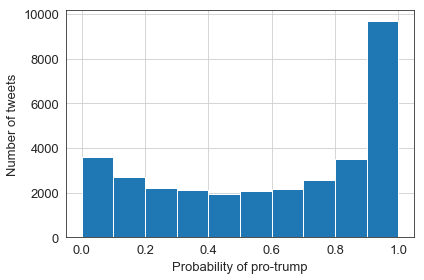

In [134]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    w = line.strip().split(",")
    if w[0] in tweet_ids:
        pros.append(float(w[1]))
        
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/probality of pro-trump.pdf", dpi=300)

trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

could not convert string to float: 'pro_trump'


(423705, 562089)

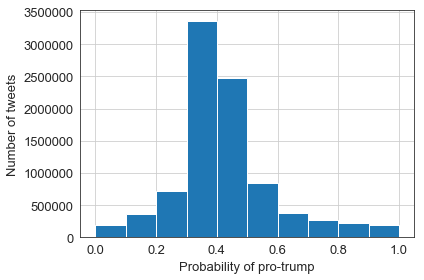

In [140]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    try:
        w = line.strip().split(",")
        pros.append(float(w[1]))
    except Exception as e:
        print(e)
        
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/pro-trump-all.pdf", dpi=300)

trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

(52962, 72734)

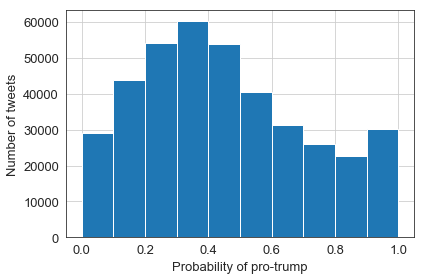

In [139]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    w = line.strip().split(",")
    if w[0] in tweet_ids:
        pros.append(float(w[1]))
        
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/pro-trump-en.pdf", dpi=300)

trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

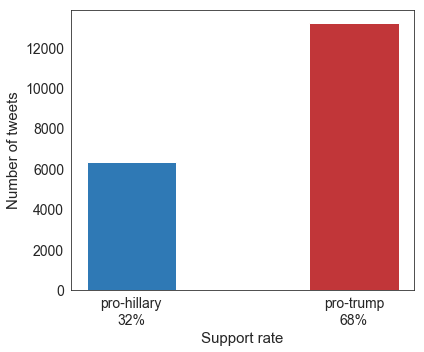

In [33]:
plt.figure(figsize=(6, 5))
plt.bar(1, hillary_count, color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, trump_count, color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(hillary_count / (trump_count + hillary_count)),
         "pro-trump\n{0:.0%}".format(trump_count / (trump_count + hillary_count))]
plt.xticks([1, 1.5], label)
plt.xlabel('Support rate', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("support rate.png", dpi=300)

### 分析构造的IRA全网络

In [2]:
all_net = nx.read_gpickle("data/network/ira-all.gpickle")

In [3]:
all_net.number_of_nodes()

136155

In [4]:
all_net.number_of_edges()

277346

In [14]:
# very important!

ira_user_set = set()
for uid in putin.IRA_user_set:
    try:
        if len(putin._map[uid]) != 64:
            ira_user_set.add(str(putin._map[uid]))
    except:
        if len(uid) != 64:
            ira_user_set.add(uid)

In [15]:
ira_user_list = list(ira_user_set)

In [17]:
all_net[ira_user_list[0]]

AtlasView({'2951904191': {}, '1339835893': {}, '2949261587': {}, '16715398': {}, '15980895': {}, '1330457336': {}, '3573336134': {}, '14522241': {}, '1640929196': {}, '716813053': {}, '22799750': {}, '759251': {}, '25073877': {}, '16589206': {}, '3313779296': {}, '41634520': {}, '1734949104': {}, '29417304': {}, '17629860': {}, '358545917': {}, '3245135844': {}, '18643437': {}, '66533920': {}, '16228398': {}, '229592356': {}, '823738296': {}, '2227403496': {}, '20772763': {}, '14717197': {}, '259001548': {}, '31228313': {}, '22203756': {}, '3124986791': {}, '439608838': {}, '17194090': {}, '4925188717': {}, '1140341359': {}, '4917092018': {}, '712967096': {}, '53130511': {}, '21688902': {}, '783214': {}, '2897970594': {}, '2864051403': {}, '18949452': {}, '15745368': {}, '45876240': {}})

In [5]:
CI_rst = np.load("data/CI_rst/CI_out_ira-all.rst.npy")
CI_rank_rst = CI_rst[0][:100]

In [7]:
gtG = gt.load_graph("data/network/ira-all.gt")

In [8]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()

In [10]:
gtG.list_properties()

CI_both        (vertex)  (type: int64_t)
CI_out         (vertex)  (type: int64_t)
id             (vertex)  (type: string)
katz           (vertex)  (type: double)
katz_rev       (vertex)  (type: double)


In [3]:
from all_tweets import ALL_TWEET

Lebron = ALL_TWEET()
all_tweets = Lebron.load_all_tweets()

loading all tweets_csv ...
finished!


In [27]:
IRA_tweet_id = all_tweets[(all_tweets.is_IRA > 0) & (all_tweets.media_type == "0")].tweet_id

In [30]:
IRA_tweet_ids = [_id for _id in IRA_tweet_id]

In [32]:
IRA_tweet_ids[0]

'786477613162246144'

## 获取IRA发布消息的client_name

In [37]:
%time all_ira_tweets = pd.read_csv("data/ira_tweets_csv_hashed.csv", usecols=["tweetid", "tweet_client_name"], dtype=str)

CPU times: user 18.4 s, sys: 824 ms, total: 19.2 s
Wall time: 19.3 s


In [38]:
from tqdm import tqdm_notebook as tqdm

client_names = []

for _id in tqdm(IRA_tweet_ids):
    client_names.append(all_ira_tweets[all_ira_tweets.tweetid == _id].tweet_client_name)

In [53]:
new_client_names = [c.get_values()[0] for c in client_names]

In [56]:
from collections import Counter

count_clinet_names = Counter(new_client_names)

In [60]:
pd.Series(count_clinet_names)

Twitter Web Client     891
Twitter for Android     18
TweetDeck               45
dlvr.it                222
dtype: int64

In [62]:
# proportion of auto client in fake news of IRA

222 / (891 + 18 + 45 + 222)

0.18877551020408162

## 回复Alex，IRA传播了哪些信息？他们影响了谁？

In [79]:
from collections import Counter
from imp import reload
import fake_identify
reload(fake_identify)

map_labels = {
    "-1": "-1",
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

Putin = fake_identify.Who_is_fake()

bias_cnt = Counter()
bias_cnt_b = Counter()
bias_cnt_sci_f = Counter()
bias_cnt_sci_a = Counter()
fact_cnt = Counter()

cnt = Counter()
for line in open("data/ira-urls-plus-2.json"):
    d = json.loads(line.strip())
#     if "error" in d and d["error"]:
#         cnt["cannot analyzing this URL"] += 1
#         print(d)
#     else:
    cnt[d["hostname"]] += 1
#         if d["hostname"] == "m.vk.com":
#             print(d)

del cnt["bi.ly"]
del cnt["bit.ly"]

print("hostname,count,category_alex,category_mbfc,category_sci_fake,category_sci_align", file=open("data/ira-hostname-stat.csv", "a")) 
for v in cnt.most_common():
    label_b = Putin.identify(v[0])
    label = Putin.identify_v2(v[0])
    label_sci_f = Putin.identify_science_fake(v[0])
    label_sci_a = Putin.identify_science_align(v[0])

    bias_cnt_b[map_labels[str(label_b)]] += v[1]
    bias_cnt[label] += v[1]
    bias_cnt_sci_f[label_sci_f] += v[1]
    bias_cnt_sci_a[label_sci_a] += v[1]
    
#     fact_cnt[rst[1]] += v[1]
    print(v[0], v[1], map_labels[str(label_b)], label, label_sci_f, label_sci_a, sep=",", file=open("data/ira-hostname-stat.csv", "a"))
    
#     if map_labels[str(label_b)] == "-1" and label != "-1":
#         print(v[0], v[1], map_labels[str(label_b)], label, sep=",")

In [76]:
bias_cnt.most_common()

[('-1', 78388),
 ('left leaning', 20707),
 ('fake', 9594),
 ('right', 4147),
 ('left', 3651),
 ('right leaning', 2937),
 ('center', 2347)]

In [77]:
bias_cnt_b.most_common()

[('-1', 98770),
 ('left leaning', 5168),
 ('right', 5127),
 ('center', 4022),
 ('extreme bias (right)', 2660),
 ('left', 2275),
 ('right leaning', 2103),
 ('fake', 1539),
 ('extreme bias (left)', 107)]

In [78]:
bias_cnt_sci_f.most_common()

[('-1', 118392), ('Red', 1636), ('Orange', 1046), ('Black', 697)]

In [80]:
import sqlite3

# all
conn = sqlite3.connect(
    "/home/alex/network_workdir/elections/databases/urls_db.sqlite")
c = conn.cursor()
c.execute('''SELECT * FROM urls;''')
col_names = [t[0] for t in c.description]

with open("disk/all_tweets.json", "w") as f:
    print("start ...")
    for d in tqdm(c.fetchall()):
        if d[8]:
            hostname = d[8].lower()
            # print(hostname)
            if hostname.startswith("www."):
                hostname = hostname[4:]
                
            label_b = map_labels[str(Putin.identify(hostname))]
            label = Putin.identify_v2(hostname)
            label_sci_f = Putin.identify_science_fake(hostname)
            label_sci_a = Putin.identify_science_align(hostname)

            json_d = {k: v for k, v in zip(col_names, d)}
            json_d["media_type"] = label_b
            json_d["c_mbfc"] = label                         
            json_d["c_sci_fake"] = label_sci_f                         
            json_d["c_sci_align"] = label_sci_a
            
            f.write(json.dumps(json_d, ensure_ascii=False) + '\n')
            # self.tweet_ids.append(json_d["tweet_id"])
            
conn.close()

start ...


分析全局的URL的情况

In [89]:


# bingo_tweets.json 是指至少被识别过一次的
with open("disk/bingo_tweets.json", "w") as f:
    for line in tqdm(open("disk/all_tweets.json")):
        d = json.loads(line.strip())
        if d["c_mbfc"] != "-1" or d["media_type"] != "-1" or d["c_sci_fake"] != "-1":
            f.write(line)
    

In [3]:
from collections import Counter

ht_cnt = Counter()

for line in tqdm(open("disk/all_tweets.json")):
    d = json.loads(line.strip())
    ht_cnt[d["final_hostname"]] += 1


In [7]:
import fake_identify

map_labels = {
    "-1": "-1",
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

Putin = fake_identify.Who_is_fake()

bias_cnt = Counter()
bias_cnt_b = Counter()
bias_cnt_sci_f = Counter()
bias_cnt_sci_a = Counter()


print("hostname,count,category_alex,category_mbfc,category_sci_fake,category_sci_align", file=open("data/all-hostname-stat.csv", "a")) 
for v in ht_cnt.most_common(1000):
    label_b = Putin.identify(v[0])
    label = Putin.identify_v2(v[0])
    label_sci_f = Putin.identify_science_fake(v[0])
    label_sci_a = Putin.identify_science_align(v[0])

    bias_cnt_b[map_labels[str(label_b)]] += v[1]
    bias_cnt[label] += v[1]
    bias_cnt_sci_f[label_sci_f] += v[1]
    bias_cnt_sci_a[label_sci_a] += v[1]
    
    print(v[0], v[1], map_labels[str(label_b)], label, label_sci_f, label_sci_a, sep=",", file=open("data/all-hostname-stat.csv", "a"))

In [84]:
bias_cnt.most_common()

[('-1', 21366414),
 ('left leaning', 11670096),
 ('left', 7276584),
 ('fake', 6668013),
 ('right', 5399583),
 ('center', 2513694),
 ('right leaning', 2227513)]

In [85]:
bias_cnt_b.most_common()

[('-1', 26093139),
 ('left leaning', 7531427),
 ('center', 6494813),
 ('left', 4365831),
 ('right', 4042993),
 ('extreme bias (right)', 3981096),
 ('fake', 2994422),
 ('right leaning', 1008316),
 ('extreme bias (left)', 609860)]

In [86]:
bias_cnt_sci_f.most_common()

[('-1', 51447062), ('Red', 2644269), ('Orange', 2011747), ('Black', 1018819)]

我们来看一下语言的问题

In [14]:
%time ira_tweets = pd.read_csv("data/ira-tweets-ele.csv")

CPU times: user 3.42 s, sys: 80 ms, total: 3.5 s
Wall time: 3 s


In [15]:
Counter(ira_tweets["tweet_language"]).most_common()

[('en', 391680)]

## IRA与谁交互了？他们的特点是什么样的？

猜测：他们的倾向非常偏右，而且这类人群很集中，是目标的一群特定用户。他们基本不会相信其它人，已经深陷到fake news中。

In [12]:
ira_tweets = pd.read_csv("data/ira-tweets-ele.csv", dtype=str)

In [13]:
ira_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

reply tweets

In [15]:
reply_ira_tweets = ira_tweets[ira_tweets.in_reply_to_tweetid.notnull()]
quote_ira_tweets = ira_tweets[ira_tweets.quoted_tweet_tweetid.notnull()]
ret_ira_tweets = ira_tweets[ira_tweets.retweet_tweetid.notnull()]
men_ira_tweets = ira_tweets[ira_tweets.user_mentions.notnull()]

len(ira_tweets), len(reply_ira_tweets), len(quote_ira_tweets), len(ret_ira_tweets), len(men_ira_tweets)

(391680, 5350, 29716, 246163, 259279)

In [41]:
for row in men_ira_tweets.user_mentions:
    print(row[1:-1].split(", "))
    break

['2683299690', '69231187']


In [26]:
# quote是不是一定是ret？极大部分是，小部分不是
len(set(quote_ira_tweets.tweetid) & set(ret_ira_tweets.tweetid))

26612

In [27]:
# quote有一些可能是reply
len(set(reply_ira_tweets.tweetid) & set(quote_ira_tweets.tweetid))

158

In [28]:
# reply一定不是ret
len(set(reply_ira_tweets.tweetid) & set(ret_ira_tweets.tweetid))

0

In [20]:
original_ira_tweets = ira_tweets[(ira_tweets.in_reply_to_tweetid.isnull()) & \
                                 (ira_tweets.quoted_tweet_tweetid.isnull()) & \
                                 (ira_tweets.retweet_tweetid.isnull())]

In [34]:
original_ira_tweets = set(ira_tweets[ira_tweets.retweet_tweetid.isnull()].tweetid.tolist())

In [35]:
len(original_ira_tweets)

145517

## 先不跟Alex数据混合起来分析一下，在fake news下，源和非源的比例

In [39]:
_tweets = {}

for line in tqdm(open("disk/all_IRA_tweets.json")):
    d = json.loads(line.strip())
    tweet = {
        "tweet_id": str(d["tweetid"]),
        "user_id": -1,
        "dt": "2000-01-01 00:00:00",
        "is_first": -1,
        "is_source": -1,
        "is_IRA": 1,
        "URL": d["final_url"].lower(),
        "hostname": d["hostname"].lower(),
        "c_alex": d["media_type"],
        "c_mbfc": d["c_mbfc"],
        "c_sci_f": d["c_sci_fake"],
        "c_sci_s": d["c_sci_align"],
        "retweeted_id": -1,
    }
    # if tweet["URL"].endswith("/"):
    #     tweet["URL"] = tweet["URL"][:-1]
    _tweets[str(d["tweetid"])] = tweet
    
_tweets = pd.DataFrame(list(_tweets.values()))

In [49]:
_tweets[_tweets.c_mbfc!="-1"].shape

(43383, 13)

In [54]:
_tweets[_tweets.c_mbfc=="left leaning"].shape

(20707, 13)

In [55]:
d = json.load(open("IRA-tweets-id.txt"))

In [57]:
maybe_tweet_ids = []

for _i in d.values():
    for _j in _i:
        maybe_tweet_ids.append(_j)

In [61]:
all_tweets_id = set(tweets.tweetid.tolist())

In [63]:
cnt = 0

for t_id in maybe_tweet_ids:
    if t_id not in all_tweets_id:
        cnt += 1
cnt

8698

8698个tweets是原来数据中没有的。